# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method.

In [2]:
def euler_solve(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

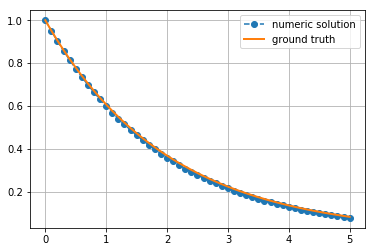

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

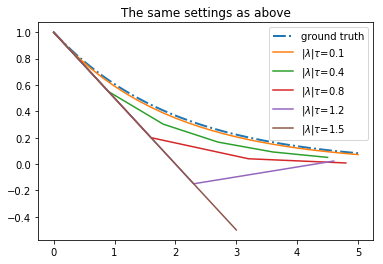

Text(0, 0.5, 'u')

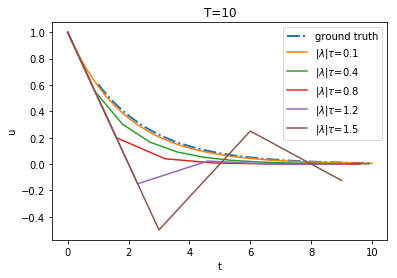

In [4]:
lt = np.linspace(0.1, 1.5, 5)/abs(lam)
plt.plot(tt, np.exp(lam*tt), '-.', lw=2, label='ground truth')
for tau in lt:
    tScale, y = euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.plot(tScale, y, label='$|\lambda| \\tau $='+str(round(tau*abs(lam), 1)))
plt.legend(loc = 'best')
plt.title('The same settings as above')
plt.show()

plt.plot(np.linspace(1, 10, 100), np.exp(lam * np.linspace(1, 10, 100)), '-.', lw=2, label='ground truth')
for tau in lt:
    tScale, y = euler_solve(lam, u0=1.0, T=10, dt=tau)
    plt.plot(tScale, y, label='$|\lambda| \\tau $='+str(round(tau*abs(lam), 1)))
plt.legend(loc = 'best')
plt.title('T=10')
plt.xlabel('t')
plt.ylabel('u')

This two pictures(especially the second one) show disatvatage of explicity Euler's method. From the lecture we know, that because of the algorythm structure $$y_{n+1}=(1+ \lambda\tau)y_{n},$$ we will have assymptotical stability $$|y_{n+1}|<|y_{n}|, n\to\infty $$ only for $$|1+\lambda\tau|<1$$
And this condition perfectly shown in the 2nd plot. The explicity metod has limitation of 'allowed' step size. That's why I changed T for second plot.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

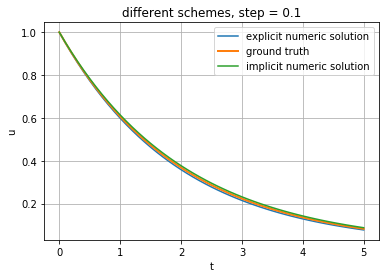

In [5]:
def implicit_euler_solve(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1 - dt*lam)
    return tt, y
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, '-', label='explicit numeric solution')
y_true = np.exp(lam*tt)
plt.plot(tt, y_true, '-', lw=2, label='ground truth')
tti, yi = implicit_euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tti, yi, '-', label='implicit numeric solution')
plt.xlabel('t')
plt.ylabel('u')
plt.title('different schemes, step = 0.1')
plt.legend(loc='best')
plt.grid(True)

I can't see the difference between this two plots visually, so let's try to change dt

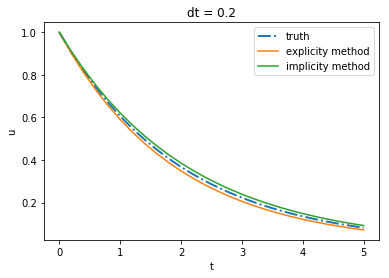

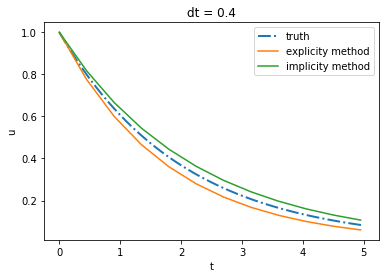

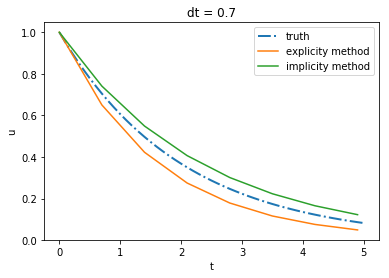

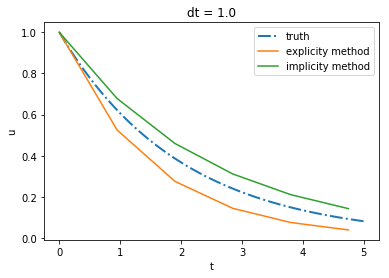

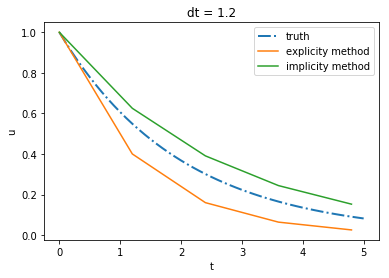

In [6]:
dt = np.linspace(0.2, 1.2, 5)
for tau in dt:
    plt.plot(tt, np.exp(lam*tt), '-.', lw=2, label='truth')
    tScale, y = euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.plot(tScale, y, label='explicity method')
    tScalei, yi = implicit_euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.plot(tScalei, yi, label='implicity method')
    plt.xlabel('t')
    plt.ylabel('u')
    plt.legend(loc = 'best')
    plt.title('dt = '+str(round(tau, 1)))
    plt.show()

As we can see, the implicity method works a little bit better, and 2 methods come closer to the solution from different sides. Now let's check stability of the implicit method:

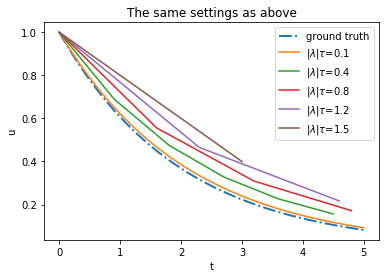

Text(0, 0.5, 'u')

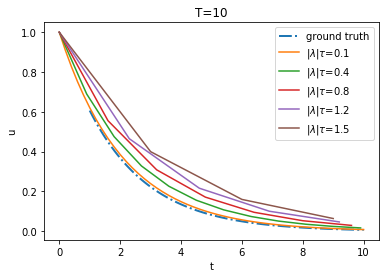

In [7]:
lt = np.linspace(0.1, 1.5, 5)/abs(lam)
plt.plot(tt, np.exp(lam*tt), '-.', lw=2, label='ground truth')
for tau in lt:
    tScale, y = implicit_euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.plot(tScale, y, label='$|\lambda| \\tau $='+str(round(tau*abs(lam), 1)))
plt.legend(loc = 'best')
plt.title('The same settings as above')
plt.xlabel('t')
plt.ylabel('u')
plt.show()

plt.plot(np.linspace(1, 10, 100), np.exp(lam*np.linspace(1, 10, 100)), '-.', lw=2, label='ground truth')
for tau in lt:
    tScale, y = implicit_euler_solve(lam, u0=1.0, T=10, dt=tau)
    plt.plot(tScale, y, label='$|\lambda| \\tau $='+str(round(tau*abs(lam), 1)))
plt.legend(loc = 'best')
plt.title('T=10')
plt.xlabel('t')
plt.ylabel('u')

As we can see, implicit method works stable for every chosen dt. It is easy to undarstand, when we see how this metod realized:
$$y_{n+1}=\frac{1}{|1-\lambda\tau|}y_{n} =>  \frac{1}{|1-\lambda\tau|}<1$$
And this is always true (for $\lambda$<0).

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [8]:
def gen_euler_solve(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((2, num_steps+1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = y[:, k] + A @ y[:, k] * dt
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

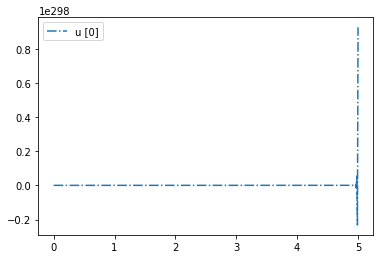

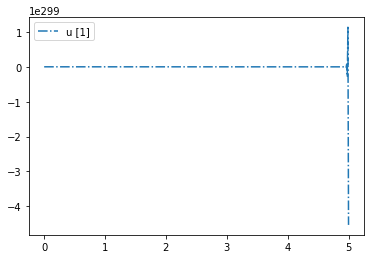

In [9]:
A = np.array(((-10, 10),(32, -499)))
u0 = np.array(((1), (0)))
dt = 0.01
T = 5
tt, y = gen_euler_solve(A, u0, T, dt)
plt.plot(tt, y[0], '-.', label='u [0]')
plt.legend()
plt.show()
plt.plot(tt, y[1], '-.', label='u [1]')
plt.legend()

As we can see, solution diverges(from the matrix look we are expecting exponentially decaying solutions). Now let's check the stiffness:

In [10]:
val = np.linalg.eigvals(A)
s = max(np.abs(val))/min(np.abs(val))
print('s =', int(s),">> 1, which means the system is stiff. So we shouldn't be surprised with crushing of explicity method, which is not stable.")

s = 53 >> 1, which means the system is stiff. So we shouldn't be surprised with crushing of explicity method, which is not stable.


### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

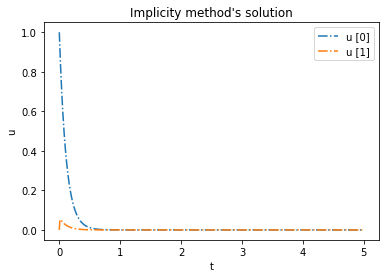

In [11]:
def implicity_gen_euler_solve(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((2, num_steps+1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = np.linalg.solve(np.eye(2) - dt * A, y[:, k])
    return tt, y
dt = 0.01
tt, y = implicity_gen_euler_solve(A, u0, T, dt)
plt.title("Implicity method's solution")
plt.xlabel('t')
plt.ylabel('u')
plt.plot(tt, y[0], '-.', label='u [0]')
plt.plot(tt, y[1], '-.', label='u [1]')
plt.legend()

Finally, solutions converges, because, as we know from the 1 excercise, implicity method is very(absloutely?) stable.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Text(0.5, 1.0, 'u(t) explicity method')

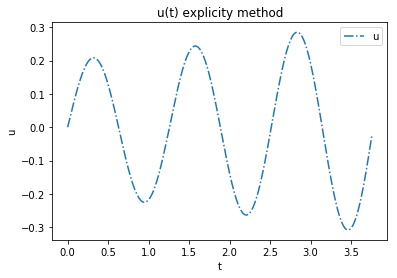

In [12]:
omega = 5
A = np.array(((0, 1),(-omega**2, 0)))
y0 = np.array(((0), (1)))
T = 2*np.pi/omega * 3
dt = 0.01
tt, y = gen_euler_solve(A, y0, T, dt)
plt.plot(tt, y[0], '-.', label='u')
plt.legend()
plt.xlabel('t')
plt.ylabel('u')
plt.title('u(t) explicity method')

Text(0, 0.5, 'E')

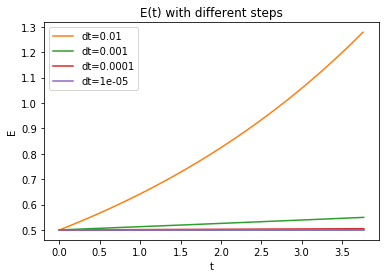

In [13]:

tScale = 1/(10**np.arange(2, 6))
E0 = 0.5*(omega**2*y[0, 0]**2+y[1, 0]**2)
plt.plot(np.linspace(0, T, 100), np.full(100, E0), '-')
for t in tScale:
    tt, y = gen_euler_solve(A, y0, T, t)
    plt.plot(tt, 0.5*(omega**2*y[0]**2+y[1]**2), label='dt='+str(t))
plt.title('E(t) with different steps')
plt.legend()
plt.xlabel('t')
plt.ylabel('E')

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [14]:
def Runge_Kutta(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.zeros((2, num_steps + 1))
    y[:, 0] = u0
    for step in range(num_steps):
        k1 = y[:, step] + 0.5 * dt * (A @ y[:, step])
        y[:, step+1] = y[:, step] + dt * (A @ k1) ##e.g k2 in the lecture
    return tt, y

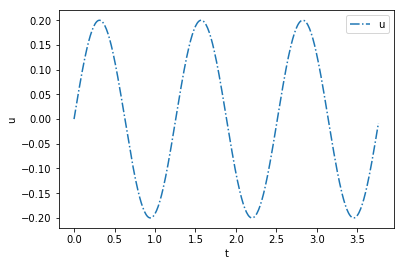

Text(0, 0.5, 'E')

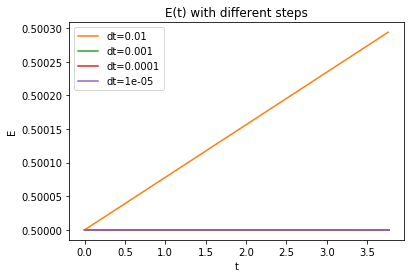

In [15]:
dt = 0.01
tt, y = Runge_Kutta(A, y0, T, dt)
plt.plot(tt, y[0], '-.', label='u')
plt.legend()
plt.xlabel('t')
plt.ylabel('u')
plt.show()

plt.plot(np.linspace(0, T, 100), np.full(100, E0), '-')
for t in tScale:
    tt, y = Runge_Kutta(A, y0, T, t)
    plt.plot(tt, 0.5*(omega**2*y[0]**2+y[1]**2), label='dt='+str(t))
plt.title('E(t) with different steps')
plt.legend()
plt.xlabel('t')
plt.ylabel('E')

Both pictures look much more better, especially, if we will pay attention on the numbers. Energy grown in both methods, but, for example, with step=0.01 with explicity Euler's method energy grown more than in 20 times(from 0.5 to 1.3), and with RK method it grown in about 0.03%. That is much more better.